# HEART DISEASE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
heart=pd.read_csv("heart.csv")

In [3]:
heart.shape

(303, 14)

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


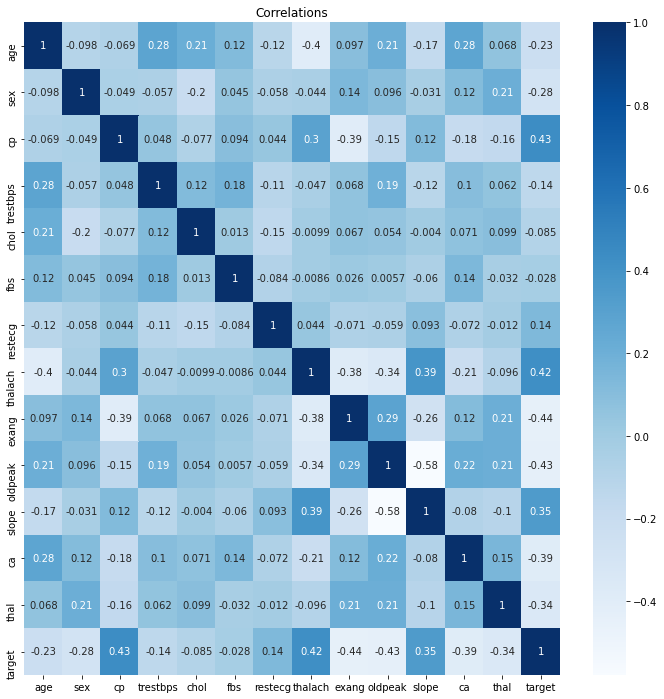

In [5]:
plt.figure(figsize=(12,12))
sns.heatmap(heart.corr(),annot=True,cmap="Blues")
plt.title("Correlations")
plt.show()

From this heatmap we can observe that the ‘cp’ i.e. chest pain is highly related to the target variable. 
Compared to relation between other two variables chest pain contributes the most in prediction in presence of heart disease.

In [6]:
#Changing our column names to meaningful names
heart.columns=['Age','Gender','ChestPainType','RestingBloodPressure','SerumCholesterol','FastingBloodSugar','RestECG',
               'MaximumHeartRate','ExerciseAngina','StDepression','StSlope','NoMajorVessels','Thalassemia','Target']

In [7]:
heart.Gender=heart.Gender.map({0:'Female',1:'Male'})
heart.ChestPainType=heart.ChestPainType.map({0:'absent',1:'Angina Pectoris',2:'Atypical Angina',3:'Non-Anginal Pain',4:'Silent Heart Attacks'})
heart.FastingBloodSugar=heart.FastingBloodSugar.map({0:'less than 120mg/ml', 1:'greater than 120mg/ml'})
heart.ExerciseAngina=heart.ExerciseAngina.map({0:'No',1:'Yes'})
heart.StSlope=heart.StSlope.map({0:'Absent',1:'Upsloping',2:'Horizontal'})
heart.Thalassemia=heart.Thalassemia.map({0:'Absent',1:'Normal',2:'Fixed Defect',3:'Reversable Defect'})
heart.Target=heart.Target.map({0:'No Heart Disease',1:'Heart Disease'})

In [8]:
heart.head()

,Age,Gender,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestECG,MaximumHeartRate,ExerciseAngina,StDepression,StSlope,NoMajorVessels,Thalassemia,Target
0,63,Male,Non-Anginal Pain,145,233,greater than 120mg/ml,0,150,No,2.3,Absent,0,Normal,Heart Disease
1,37,Male,Atypical Angina,130,250,less than 120mg/ml,1,187,No,3.5,Absent,0,Fixed Defect,Heart Disease
2,41,Female,Angina Pectoris,130,204,less than 120mg/ml,0,172,No,1.4,Horizontal,0,Fixed Defect,Heart Disease
3,56,Male,Angina Pectoris,120,236,less than 120mg/ml,1,178,No,0.8,Horizontal,0,Fixed Defect,Heart Disease
4,57,Female,absent,120,354,less than 120mg/ml,1,163,Yes,0.6,Horizontal,0,Fixed Defect,Heart Disease


In [9]:
heart.describe()

,Age,RestingBloodPressure,SerumCholesterol,RestECG,MaximumHeartRate,StDepression,NoMajorVessels
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,0.528053,149.646865,1.039604,0.729373
std,9.082101,17.538143,51.830751,0.525860,22.905161,1.161075,1.022606
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,1.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,1.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,2.000000,202.000000,6.200000,4.000000


(1) The minimum age is 29 year and Maximum age is 77years. No children involved in this data. 
(2) The average Resting Blood Pressure is 131 and its maximum value is 200. 
(3) The average Cholesterol level is 126 and the maximum value is 564. 
(4) The average heart rate is 149 and the maximum is 202.

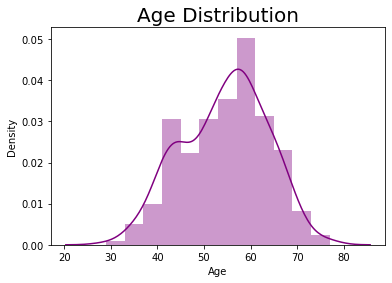

In [10]:
sns.distplot(heart["Age"],color="Purple")
plt.title("Age Distribution",size=20)
plt.show()

(1)Distribution of age looks close to a Normal Distribution, Zero Skewness i.e. Mean=Median. 
(2)This data has age of patients ranging from 29-77.

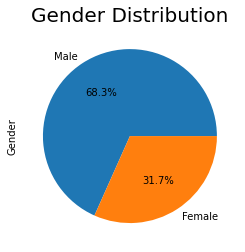

In [11]:
heart['Gender'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Gender Distribution",size=20)
plt.show()

The number of Male population are more than that of Female population.

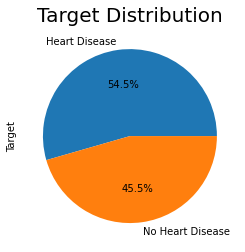

In [12]:
heart['Target'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Target Distribution",size=20)
plt.show()

More than 50% people is suffering with heart disease.

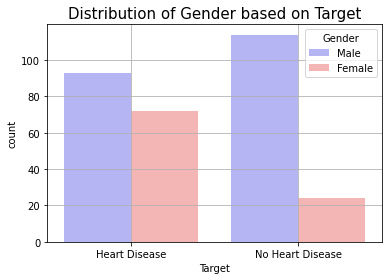

In [13]:
sns.countplot(data=heart,x="Target",hue="Gender",palette="bwr")
plt.title("Distribution of Gender based on Target",size=15)
plt.grid()
plt.show()

As we can see ratio of having heart disease in males is higher than females, 
but females have a higher chance of having heart diseases as compared to males.

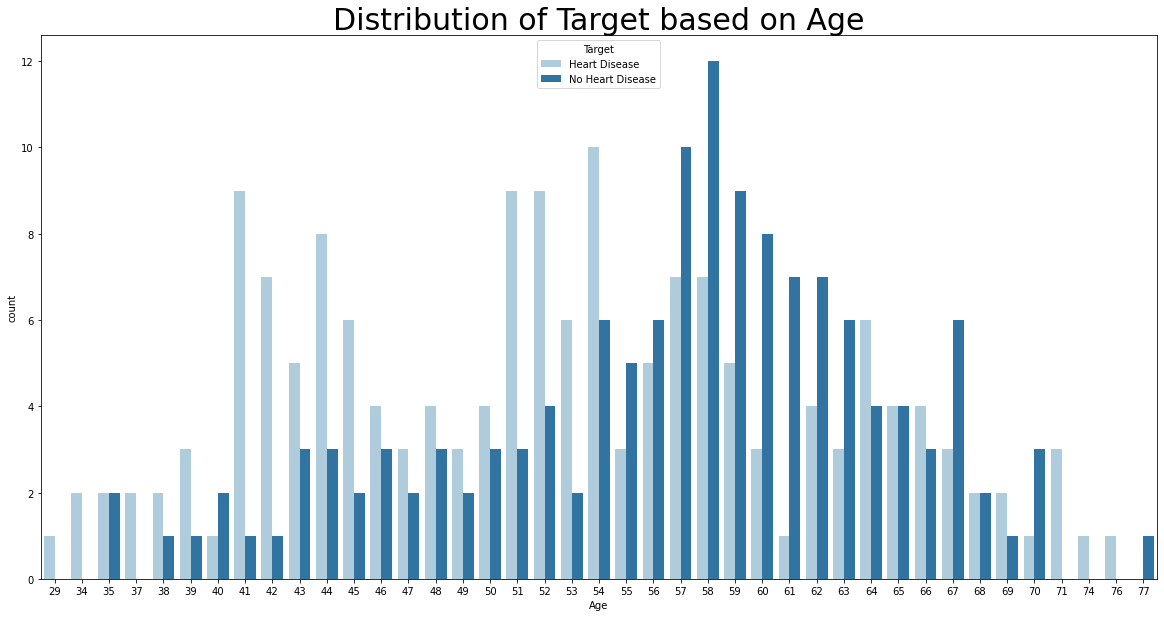

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(data=heart,x="Age",hue="Target",palette="Paired")
plt.title("Distribution of Target based on Age", size=30)
plt.show()

(1) Heart disease are mostly seen in elderly stages.
(2) There are higher risk of heart disease who is above 40 as ratio of having heart disease gets higher from the age of 40.

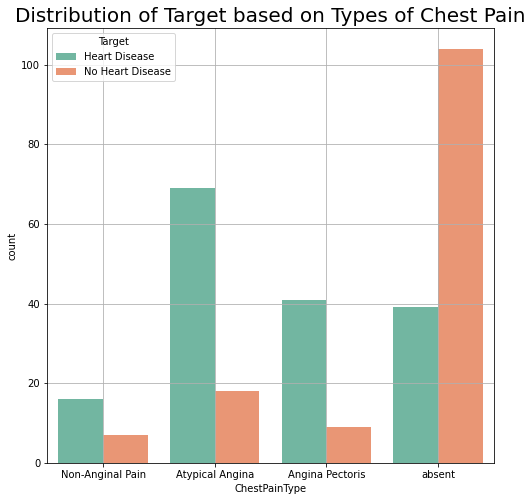

In [15]:
plt.figure(figsize=(8,8))
sns.countplot(data=heart,x="ChestPainType",hue="Target",palette="Set2")
plt.title("Distribution of Target based on Types of Chest Pain", size=20)
plt.grid()
plt.show()

(1) People suffering with Atypical Angina has higher chances of having heart disease followed by Angina Pectoris. 
(2) Also, around 40 of the patients don't have chest pain but still have heart disease. 
(3) Hence absence of chest pain doesn't mean that the patient being diagonsed has no Heart Disease.

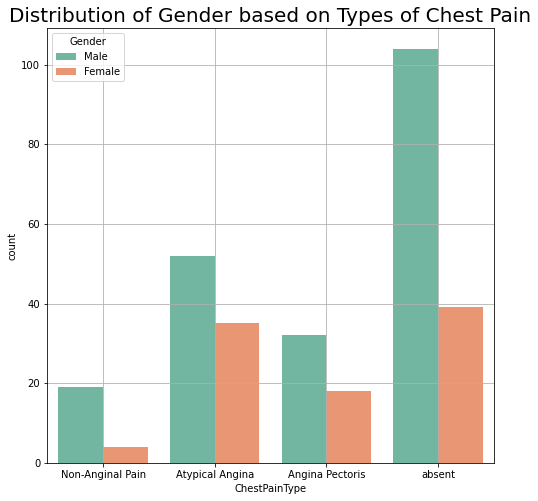

In [16]:
plt.figure(figsize=(8,8))
sns.countplot(data=heart,x="ChestPainType",hue="Gender",palette="Set2")
plt.title("Distribution of Gender based on Types of Chest Pain", size=20)
plt.grid()
plt.show()

There are more male patients with no chest pain as compare to females, 
but as we know absence of chest pain doesn't mean that the patient being diagonsed has no Heart Disease.

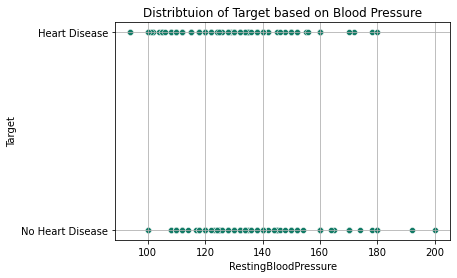

In [18]:
sns.scatterplot(data=heart,x="RestingBloodPressure",y="Target",color="#117A65")
plt.title("Distribtuion of Target based on Blood Pressure")
plt.grid()
plt.show()

Blood pressure lower than 120 mmHg is considered as normal range. Irrespective of patients having heart disease or not ,more than 50% patients have higher blood pressure. That means more than 50% patients is under risk of having heart disease as High Blood Pressure is strongest evidence.

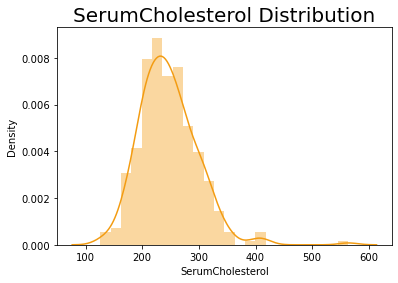

In [19]:
sns.distplot(heart["SerumCholesterol"],color="#F39C12")
plt.title("SerumCholesterol Distribution",size=20)
plt.show()

Positively skewed distribution i.e. the mean is greater than the median

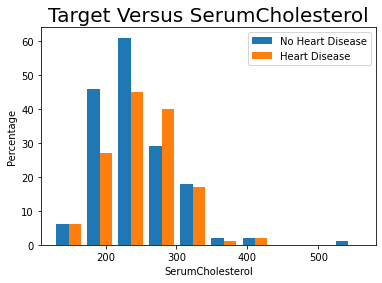

In [20]:
plt.hist([heart[heart.Target=='Heart Disease'].SerumCholesterol, heart[heart.Target=='No Heart Disease'].SerumCholesterol], bins = 10, label=["No Heart Disease","Heart Disease"])
plt.title("Target Versus SerumCholesterol",size=20)
plt.xlabel("SerumCholesterol")
plt.ylabel("Percentage")
plt.legend()
plt.show()

(1) Amounts of people having heart disease are over 200mg/dl of chol. 
(2) According to the research, the normal value of chol should be lower than 200mg/dl. 
(3) Majority of the people in the dataset have high levels of cholesterol. 
(4) At a certain level, the presence of a heart disease is slightly higher on higher cholesterol levels.

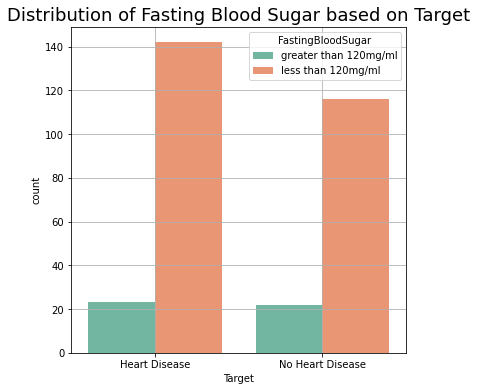

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(data=heart,x="Target",hue="FastingBloodSugar",palette="Set2")
plt.title("Distribution of Fasting Blood Sugar based on Target", size=18)
plt.grid()
plt.show()

It doesn't seem useful to know if a patient has a heart disease or not 
Patients having fasting blood sugar lower than 120 mg/dl have a high chance of suffering from Heart Disease 
but this is not a clear indicator as many of the patients without Heart Disease also have the same scenario.

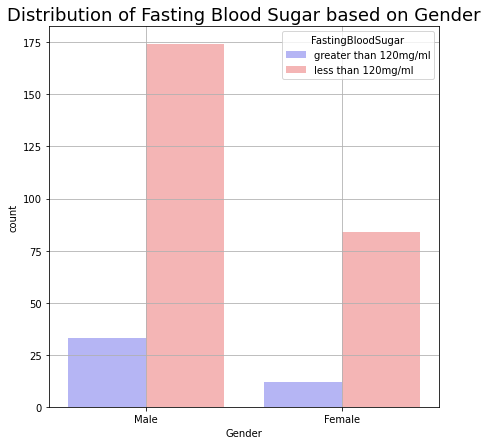

In [23]:
plt.figure(figsize=(7,7))
sns.countplot(data=heart,x="Gender",hue="FastingBloodSugar",palette="bwr")
plt.title("Distribution of Fasting Blood Sugar based on Gender", size=18)
plt.grid()
plt.show()

There are more Male Patients with lower and greater than 120 mg/dl fasting sugar as compared to Female Patients.

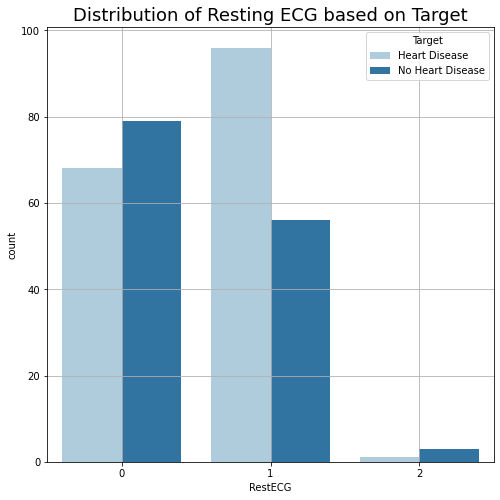

In [25]:
plt.figure(figsize=(8,8))
sns.countplot(data=heart,x="RestECG",hue="Target",palette="Paired")
plt.title("Distribution of Resting ECG based on Target", size=18)
plt.grid()
plt.show()

(1) There are many patients with having RestECG = 1 (Normal) and suffering from heart disease. 
(2) Also, RestECG = 2 (Abnormal) seems to be very rare.

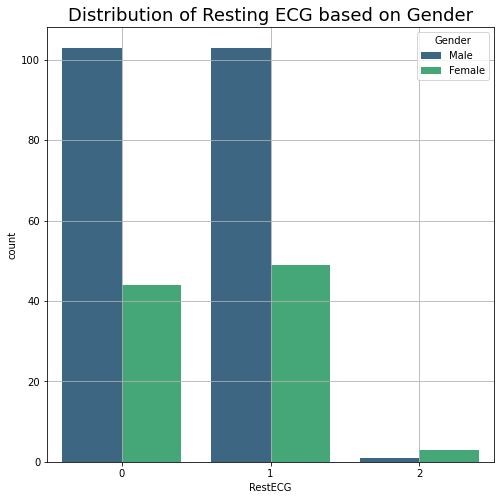

In [26]:
plt.figure(figsize=(8,8))
sns.countplot(data=heart,x="RestECG",hue="Gender",palette="viridis")
plt.title("Distribution of Resting ECG based on Gender", size=18)
plt.grid()
plt.show()

RestECG = 0 (Hypertrophy) and RestECG = 1(Normal) is found in most of the male as well as female patients.

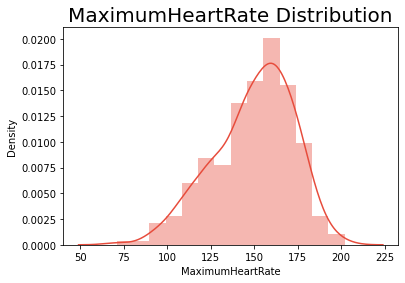

In [27]:
sns.distplot(heart["MaximumHeartRate"],color="#E74C3C")
plt.title("MaximumHeartRate Distribution",size=20)
plt.show()

(1) Negative Skewness,Mean is less than Median.
(2) The distribution of Maximum Heart Rate is close to normal distribution with little bit skewing to the left.

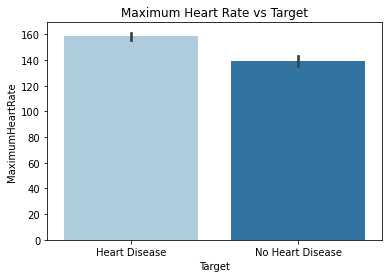

In [28]:
sns.barplot(data=heart,x="Target",y="MaximumHeartRate",palette="Paired")
plt.title('Maximum Heart Rate vs Target')
plt.show()

The Maximum Heart Rate in Heart Disease Patients is a bit more and than Non-Heart Disease Patients.

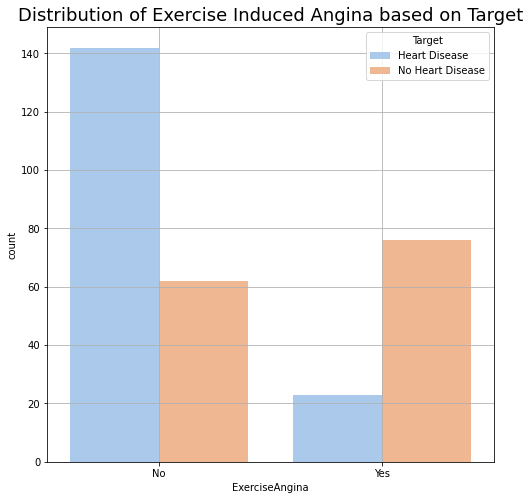

In [29]:
plt.figure(figsize=(8,8))
sns.countplot(data=heart,x="ExerciseAngina",hue="Target",palette="pastel")
plt.title("Distribution of Exercise Induced Angina based on Target", size=18)
plt.grid()
plt.show()

Excercise Induced Angina is not very common in patients with Heart Diseases.

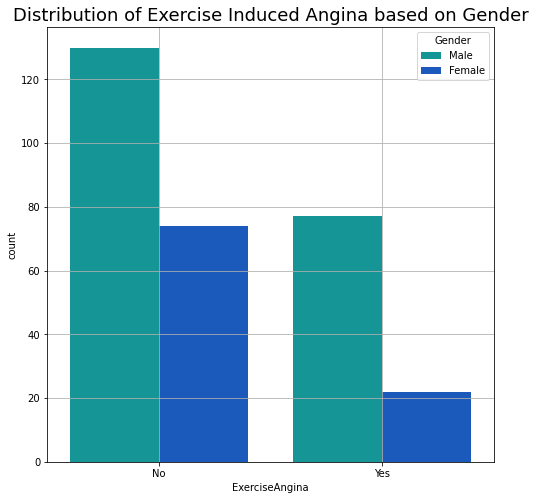

In [30]:
plt.figure(figsize=(8,8))
sns.countplot(data=heart,x="ExerciseAngina",hue="Gender",palette="winter_r")
plt.title("Distribution of Exercise Induced Angina based on Gender", size=18)
plt.grid()
plt.show()

There are more patients without Exercise Induced Angina out of which male are more in number and 
this is also true for patients with Exercise Induced Angina.

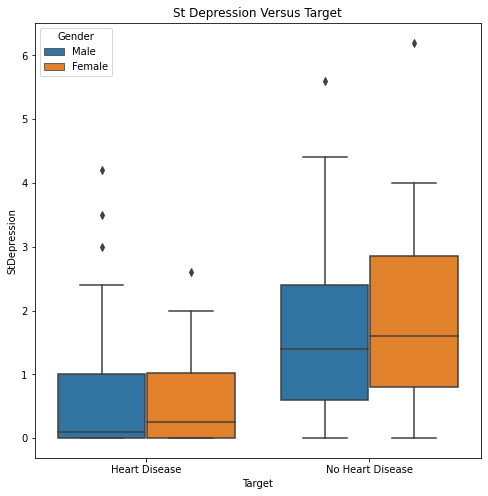

In [32]:
plt.figure(figsize=(8,8))
sns.boxplot(data=heart,x="Target",y="StDepression",hue="Gender")
plt.title("St Depression Versus Target")
plt.show()

(1) Non-Heart Disease Patients seem to have high Depression.
(2) Female Patients doesn't matter whether there is disease or not, seems to have high ST Depression as compared to Male.

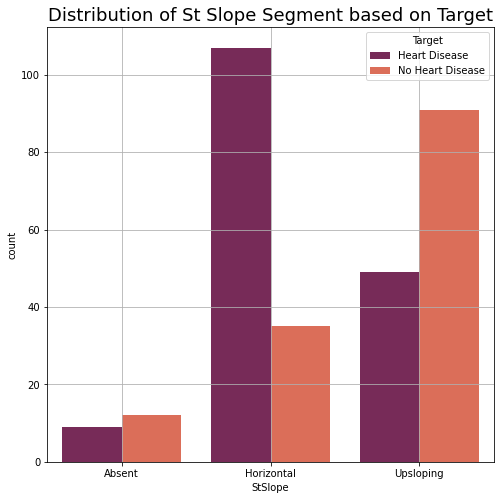

In [33]:
plt.figure(figsize=(8,8))
sns.countplot(data=heart,x="StSlope",hue="Target",palette="rocket")
plt.title("Distribution of St Slope Segment based on Target", size=18)
plt.grid()
plt.show()

(1) Upsloping ST segment is generally considered as normal
(2) ST elevation with a horizontal ST segment is more characteristic of myocardial ischemia
(when blood flow to the heart muscle is complete blockage of a coronary artery)

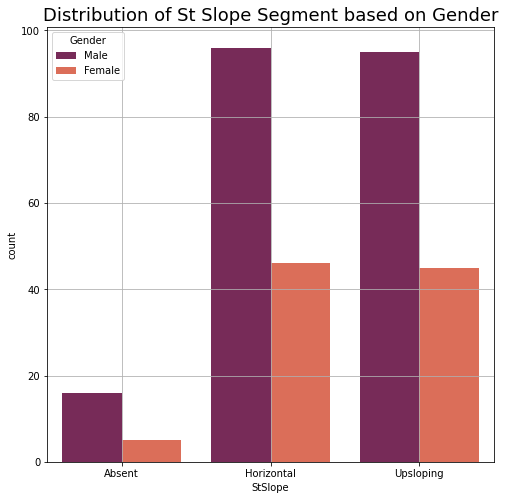

In [34]:
plt.figure(figsize=(8,8))
sns.countplot(data=heart,x="StSlope",hue="Gender",palette="rocket")
plt.title("Distribution of St Slope Segment based on Gender", size=18)
plt.grid()
plt.show()

(1) Horizontal and Upsloping Slope is more seen in Males as compare to Females
(2) Male has a higher chance of having blockage of coronary artery as Horizontal sloping is seen more in Males

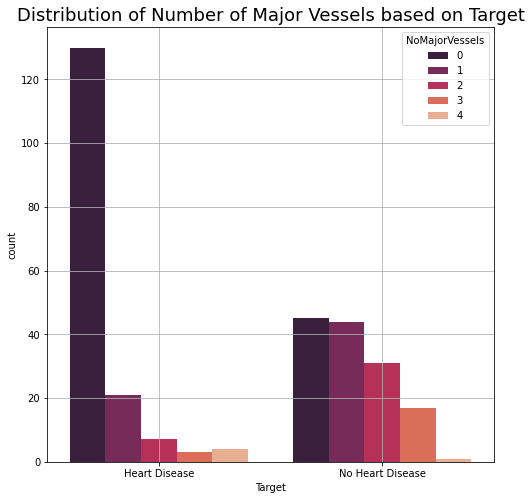

In [35]:
plt.figure(figsize=(8,8))
sns.countplot(data=heart,x="Target",hue="NoMajorVessels",palette="rocket")
plt.title("Distribution of Number of Major Vessels based on Target", size=18)
plt.grid()
plt.show()

Narrow blood vessels:
(1) There are large number of Heart Patients with vessel=0 as compared to others. 
(2) There are almost same number of Non-Heart Patients for vessels 0 and 1. 
(3) There are very less number of patients with vessel = (2,3 or 4)
(4) This is why the higher the value, the more likely it is to have a heart disease.

# Thalassemia: 
Thalassemia is a blood disorder passed down through families (inherited) in which the 
body makes an abnormal form or inadequate amount of hemoglobin.

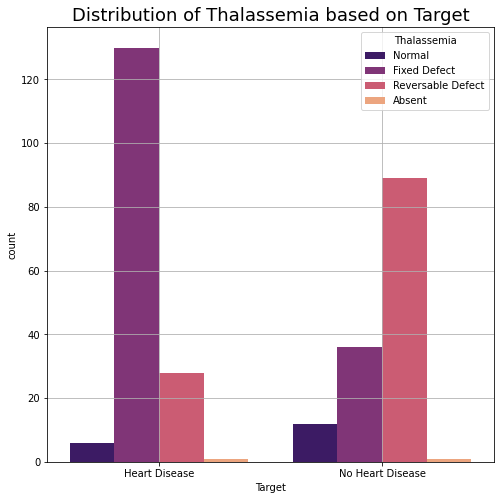

In [36]:
plt.figure(figsize=(8,8))
sns.countplot(data=heart,x="Target",hue="Thalassemia",palette="magma")
plt.title("Distribution of Thalassemia based on Target", size=18)
plt.grid()
plt.show()

Fixed Defect(no blood flow in some part of the heart) is more seen in patients suffering with Heart Disease whereas 
Reversable Defect(a blood flow is observed but it is not normal) is present more in No HeartDisease.

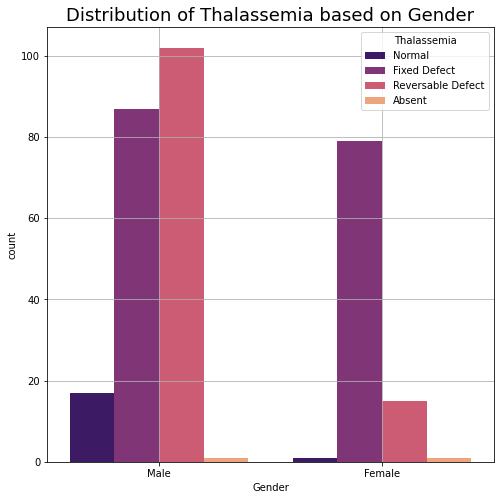

In [37]:
plt.figure(figsize=(8,8))
sns.countplot(data=heart,x="Gender",hue="Thalassemia",palette="magma")
plt.title("Distribution of Thalassemia based on Gender", size=18)
plt.grid()
plt.show()

In Males Reversable Defect is much higher followed by Fixed Defect
whereas in Females Fixed Defect is higher.

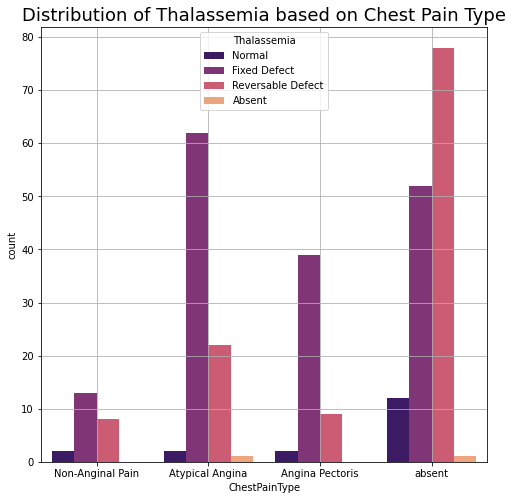

In [38]:
plt.figure(figsize=(8,8))
sns.countplot(data=heart,x="ChestPainType",hue="Thalassemia",palette="magma")
plt.title("Distribution of Thalassemia based on Chest Pain Type", size=18)
plt.grid()
plt.show()

There are more number of patients with Fixed Defect Thalassemia in any type of chest pains 
whereas patients without chest pain and Reversable Defect Thalassemia are very common.
Almost every patient, having heart disease or not, has Thalassemia.

# Conclusion

Cardiovascular diseases is the most top disease which causes millions of deaths.
We can take some steps to prevent this disease:
The most obvious symptom is chest pain. 
There are three types of chest pain, but only atypical angina is strongly related to the heart disease. 
No matter which type of chest pain you have, please visit to a Doctor once.
In addition, everyone should always keep an eye on the Resting blood pressure. 
The ideal resting blood pressure is lower than 120mmHg, 
but if your blood pressure is much lower than the 120mmHg, it means that you are under high risk of heart disease. 
Record your Maximum Heart Rate to make sure that your heart is still healthy. 
Once the rate rises year by year, there must be something wrong with you.
Don't forget the older we are, the higher the risks of Heart Disease.
No matter how healthy we are, we must do annual examination of ourself because another feature that can not be 
taken care of by ourselves is age, as we have seen after 40 chances of getting heart disease increses.